# L9b: Introduction to Hopfield Networks
In this lab, we are going to explore encoding and retriving multiple patterns using Hopfield Networks. In lecture, we considered only a single memory. In this lab, we expand the number of memories that we encode in the network. Does the retrival algorithm presented in `L9a` work for multiple memories?

## Tasks
Before we get started, let's first understand the Hopfield Network. Take a few minutes to review the background material on Hopfield Networks if you are not already familiar with them. Next, execute the `Run All Cells` command to check if you (or your neighbor) have any code or setup issues. Code issues, then raise your hands - and let's get those fixed!

* __Task 1: Setup, Data, Constants (5 min)__: Let's take 5 minutes to load [the MINST handwritten digits dataset](https://en.wikipedia.org/wiki/MNIST_database) that our Hopfield network will memorize.
*  __Task 2: Learn the Weights of the Network (5 min)__: In this task, we'll learn the weights of the Hopfield network from the training memories (images). A [Hopfield network](https://en.wikipedia.org/wiki/Hopfield_network) uses a special [Hebbian learning rule](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/2010.01472), where the weights $w_{ij}\in\mathbf{W}$ are _encoded_ by the image (or memory) the network is trying to learn.
* __Task 3: Retrieve a memory from the network (30 min)__: In this task, we will retrieve a memory from the Hopfield network starting from a random state vector $\mathbf{s}_{\circ}$. We'll corrupt an image with random noise, and then see if the model recovers the correct memory given the corrputed starting point.

## Background: What is a Hopfield network?
A [Hopfield network](https://en.wikipedia.org/wiki/Hopfield_network) is a fully connected undirected graph 
consisting of $N$ nodes, where each node in the graph has a state $s = \pm{1}$; each node is connected to every other node, but not to itself, i.e., the network has no self-loops. The weights of the connection between node $i$ and $j$, denoted as $w_{ij}\in\mathbf{W}$ are learned using [a Hebbian learning rule](https://en.wikipedia.org/wiki/Hebbian_theory). 
* _What is Hebbian learning?_ The [Hebbian learning rule](https://en.wikipedia.org/wiki/Hebbian_theory), proposed by [Donald Hebb in 1949](https://en.wikipedia.org/wiki/Donald_O._Hebb), says that synaptic connections between neurons are strengthened when they activate (fire) simultaneously, forming the biological basis for __associative learning__. This "fire together, wire together" principle underpins unsupervised learning in neural networks, linking co-active nodes to enable pattern storage and adaptation.
* _How is this different from other learning approaches?_ Unlike the previous examples of learning, e.g., logistic regression, or any of the online learning approaches that we looked at previously, the parameters (weights) in a [Hopfield network](https://en.wikipedia.org/wiki/Hopfield_network) are entirely specified by the memories we want to encode. Thus, we do not need to search for weights or learn them by experimenting with the world. Instead, we can directly compute the weights from the memories we want to encode.

### Encoding memories into a Hopfield network
Suppose we wish our network to memorize $m$-images, where each image is an $n\times{n}$ collection of black and white pixels represented as a vector $\mathbf{s}_{i}\in\left\{-1,1\right\}\in{R}^{n^2}$. We encode the image using the following rule: if the pixel is white, we set the value to $1$, and if the pixel is black, we set the value to $-1$. Then, the weights that encode these $m$-images are given by:
$$
\begin{equation*}
\mathbf{W} = \frac{1}{m}\cdot\sum_{i=1}^{m}\mathbf{s}_{i}\otimes\mathbf{s}_{i}^{\top}
\end{equation*}
$$
where $\mathbf{s}_{i}$ denotes the state (pixels) of the image we want to memorize, and $\otimes$ denotes the outer product. Thus, the weights are the average of all of our memories!

* __How big is $m$?__: The maximum theoretical storage limit $K_{\text{max}}$ (the maximum number of possible images that can be stored) of a Hopfield network, using the standard Hebbian learning rule, is approximately $K_{max}\sim{0.138}{N}$, where $N$ is the number of neurons in the network. Thus, the network can reliably store about 14% of its size in patterns before retrieval errors become significant due to interference between stored patterns.

Suppose we've encoded $m$ images and want to retrieve one of them. This seems magical. How does it work? 

### Memory retrieval
The basic idea of [a Hopfield network](https://en.wikipedia.org/wiki/Hopfield_network) is that each memory is encoded as a _local minimum_ of a global energy function. Thus, during memory retrieval, when we supply a random state vector $\hat{\mathbf{s}}$, we will recover the _closet_ memory encoded in the network to where we start.
The overall energy of the network is given by:
$$
\begin{equation*}
E(\mathbf{s}) = -\frac{1}{2}\cdot\sum_{ij}w_{ij}s_{i}s_{j} - \sum_{i}b_{i}s_{i}
\end{equation*}
$$
where $w_{ij}\in\mathbf{W}$ are the weights of the network, and $b_{i}$ is a bias term. The bias term is used to control the activation of the neurons in the network. The bias term is usually set to zero, but it can be used to control the activation threshold of the neurons in the network.

#### Algorithm
__Initialize__: Compute the weights $w_{ij}\in\mathbf{W}$ using the Hebbian learning rule, as described above.  Initialize the network with a random state $\mathbf{s}$. Then, use the following algorithm to retrieve a memory:

While __not__ converged:
1. Compute the energy of the network in the current state $\mathbf{s}$ before the update: $E(\mathbf{s})$.
1. Asynchronous update. Choose a random node $i$ and compute a new (potential) state $s_{i}^{\prime}$ using the update rule: $s_{i}^{\prime} \leftarrow \sigma\left(\sum_{j}w_{ij}s_{j}-b_{i}\right)$, where $\sigma$ is [the `sign(...)` function](https://docs.julialang.org/en/v1/base/math/#Base.sign) and $b_{i}$ is a bias (threshold) parameter.  
2. Compute the energy of the network after the update: $E(\mathbf{s}^{\prime})$. Update the state of the network: $\mathbf{s} \leftarrow \mathbf{s}^{\prime}$.
3. Check for convergence: if the change in the energy of the network is small $(E(\mathbf{s}^{\prime}) - E(\mathbf{s}))^{2} \leq\epsilon$ and we have hit the minimum number of iterations (visited each pixel on average $n$ times), then we have converged.
4. Continue until convergence.

## Task 1: Setup, Data, and Prerequisites
We set up the computational environment by including the `Include.jl` file, loading any needed resources, such as sample datasets, and setting up any required constants. 
* The `Include.jl` file also loads external packages, various functions that we will use in the exercise, and custom types to model the components of our problem. It checks for a `Manifest.toml` file; if it finds one, packages are loaded. Other packages are downloaded and then loaded.

In [4]:
include("Include.jl"); # load a bunch of libs, including the ones we need to work with images

In [5]:
file_extension(file::String) = file[findlast(==('.'), file)+1:end]; # helper function to get the file extension

### Load the MINST digits data set
In this example, we'll use a Hopfield network to learn a single image pattern from [the MINST handwritten digits dataset](https://en.wikipedia.org/wiki/MNIST_database). The goal is to train the network to recognize a digit, e.g., "3" or "5", etc, and then retrieve it from a noisy input.

Load a training image dataset that we'll encode into the Hopfield network. We'll save training data in the `training_image_dataset` variable.
* _What's in the training dataset_? The `training_image_dataset` will be of type `Vector{Tuple{Vector{Float32}, OneHotVector{UInt32}}}` where the first element is the input data `x.` The second element is the `label,` i.e., whether the image corresponds to `0,....,9`. However, the label is encoded as a `OneHotVector` (see below).
* _Hmmm. That's strange_. The `Vector{Tuple{Vector{Float32}, OneHotVector{UInt32}}}` type has a couple of _weird features_. First, notice that the floating point is `Float32`, not the default `Float64`. Next, the labels are [One Hot ecoded](https://en.wikipedia.org/wiki/One-hot). Finally, the input data `x` is a Vector, not a Matrix (even though the original image is a matrix of `Gray` values).

However, before we load the training data, let's set some constants, which we use below. The comment next to each constant describes it, its permissible values, units, etc.

In [7]:
number_of_training_examples = 30; # how many training examples of *each* number to include from the library
number_digit_array = range(0,length=10,step=1) |> collect; # numbers 0 ... 9
number_of_rows = 28; # number of rows in the image
number_of_cols = 28; # number of cols in the image
number_of_pixels = number_of_rows*number_of_cols; # how many pixels do we have in the image?
number_of_images_to_memorize = 2; # number of images that we want to encode

`Unhide` the code blocks below to see how we construct and populate the `training_image_dataset` variable. First, we load all the images into the `training_image_dictionary::Dict{Int64, Array{Gray{N0f8},3}}`, and then we'll convert these to a vector format below.

In [9]:
training_image_dictionary = let
    training_image_dictionary = Dict{Int64, Array{Gray{N0f8},3}}();
    for i ∈ number_digit_array
        
        # create a set for this digit -
        image_digit_array = Array{Gray{N0f8},3}(undef, number_of_rows, number_of_cols, number_of_training_examples);
        files = readdir(joinpath(_PATH_TO_IMAGES,"$(i)")); 
        imagecount = 1;
        for fileindex ∈ 1:number_of_training_examples
            filename = files[fileindex];
            ext = file_extension(filename)
            if (ext == "jpg")
                image_digit_array[:,:,fileindex] = joinpath(_PATH_TO_IMAGES, "$(i)", filename) |> x-> FileIO.load(x);
                imagecount += 1
            end
        end
    
        # capture -
        training_image_dictionary[i] = image_digit_array
    end
    training_image_dictionary
end;

Next, we take the images in array format and vectorize them. 
* _What do we mean by vectorize_? Each $N\times{N}$ image array containing the grayscale values at each pixel is converted to an $N^{2}$ vector of values. What image class, i.e., what number it represents, is then converted to [one-hot format](https://en.wikipedia.org/wiki/One-hot). The converted data is stored in the `training_image_dataset::Vector{Tuple{Vector{Float32}, OneHotVector{UInt32}}}` variable.
* _What's the deal with Float32_? Most neural network libraries (or other machine learning calculations) use `Float32` (or lower) to save memory because of the large number of parameters associated with the network. Additionally, model training is often carried out using specialized hardware [such as Graphical Processing Units (GPUs)](https://www.nvidia.com/en-us/data-center/h100/), which has different memory constraints.

In [11]:
training_image_dataset = let
    training_image_dataset = Vector{Tuple{Vector{Float32}, OneHotVector{UInt32}}}()
    for i ∈ number_digit_array
        Y = onehot(i, number_digit_array);
        X = training_image_dictionary[i];
        
        for t ∈ 1:number_of_training_examples
            D = Array{Float32,1}(undef, number_of_pixels);
            linearindex = 1;
            for row ∈ 1:number_of_rows
                for col ∈ 1:number_of_cols
                    D[linearindex] = X[row,col,t] |> x-> convert(Float32,x);
                    linearindex+=1;
                end
            end
    
            training_tuple = (D,Y);
            push!(training_image_dataset,training_tuple);
        end
    end
    training_image_dataset
end;

## Task 2: Learn the Weights of the Network
In this task, we'll learn the weights of the Hopfield network using the training data. A [Hopfield network](https://en.wikipedia.org/wiki/Hopfield_network) uses a special [Hebbian learning rule](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/2010.01472), where the weights $w_{ij}\in\mathbf{W}$ are _encoded_ by the image (or memory) the network is trying to learn. 

Suppose we wish our network to memorize $m$-images, where each image is an $n\times{n}$ collection of black and white pixels represented as a vector $\mathbf{s}_{i}\in\left\{-1,1\right\}\in{R}^{n^2}$. We encode the image using the following rule: if the pixel is white, we set the value to $1$, and if the pixel is black, we set the value to $-1$. Then, the weights that encode these $m$-images are given by:
$$
\begin{equation*}
\mathbf{W} = \frac{1}{m}\cdot\sum_{i=1}^{m}\mathbf{s}_{i}\otimes\mathbf{s}_{i}^{\top}
\end{equation*}
$$
where $\mathbf{s}_{i}$ denotes the state (pixels) of the image we want to memorize, and [$\otimes$ denotes the outer product](https://en.wikipedia.org/wiki/Outer_product). Thus, the weights are the average of all of our memories!

* __How big is $m$?__: The maximum theoretical storage limit $K_{\text{max}}$ (the maximum number of possible images that can be stored) of a Hopfield network, using the standard Hebbian learning rule, is approximately $K_{max}\sim{0.138}{N}$, where $N$ is the number of neurons (nodes) in the network. Thus, the network can reliably store about 14% of its size in patterns before retrieval errors become significant due to interference between stored patterns.
* Paper exploring this theoretical limit: [Folli V, Leonetti M, Ruocco G. On the Maximum Storage Capacity of the Hopfield Model. Front Comput Neurosci. 2017 Jan 10;10:144. doi: 10.3389/fncom.2016.00144. PMID: 28119595; PMCID: PMC5222833.](https://pubmed.ncbi.nlm.nih.gov/28119595/)

In [13]:
Kmax = 0.138*number_of_pixels |> x-> round(x, RoundDown) # max number of images the network can memorize

108.0

Next, let's generate a random set of image indexes that we encode into the model. We'll store this collection in the `image_index_set_to_encode::Set{Int64}` variable.
* _How do we build this set_? We specify the number of images that we want in the `number_of_images_to_memorize::Int` variable; then we iterate using [a `while-loop`](https://docs.julialang.org/en/v1/base/base/#while) until we generate the required number of indexes _randomly_. We stop the loop once we hit our target number. Fun data structure question: why do we use [a Julia `Set`](https://docs.julialang.org/en/v1/base/collections/#Base.Set) instead of an array?

`Unhide` the code block below to see how we generated the `image_index_set_to_encode::Set{Int}` index set.

In [15]:
image_index_set_to_encode = let

    # how many images do we want to encode?
    number_of_possible_images = length(training_image_dataset);
    image_index_set_to_encode = Set{Int64}();

    is_ok_to_stop = false; # iteration flag
    while (is_ok_to_stop == false)
        
        # generate a random index -
        j = rand(1:number_of_possible_images);
        push!(image_index_set_to_encode, j); # add to the image set -

        # check: have we hit the number that we want?
        if (length(image_index_set_to_encode) ≥ number_of_images_to_memorize)
            is_ok_to_stop = true;
        end
    end

    # return 
    image_index_set_to_encode;
end;

In [16]:
image_index_set_to_encode

Set{Int64} with 2 elements:
  293
  159

Let's see what images we selected at random. Thus, these will be the `true` images. In a perfect world, our network will be able to retrieve each of these images, given the appropriate input vector $\mathbf{s}_{\circ}$. `Unhide` the code block below to see how we decoded and displayed these images.

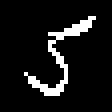

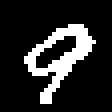

In [18]:
let

    index_vector = image_index_set_to_encode |> collect |> sort; # we'll process this in this order 
    for example_image_index ∈ index_vector
    
        ŝₖ = training_image_dataset[example_image_index][1]; # raw state *not* scaled to -1,1
        s = Array{Int32,1}(undef, number_of_pixels); # initialize some space
        for i ∈ 1:number_of_pixels
            pixel =  ŝₖ[i] |> x-> round(Int,x);
            if pixel == 0.0
                s[i] = -1
            else
                s[i] = 1;
            end
        end
        display(decode(s) |> img -> Gray.(img))
    end
end

### Encode a Hopfield model
Now that we have the training images let's encode the model. We'll compute the weights and the bias term and store them [in an instance of the `MyClassicalHopfieldNetworkModel` type](src/Types.jl). The weights are stored in the `W` field, and the bias term is stored in the `b` field. 
* _How do we build this model_? We build the model (and estimate the weight matrix and bias vector) using [the `build(...)` method](src/Factory.jl). This method takes the type of thing we want to construct, namely [a `MyClassicalHopfieldNetworkModel` instance](src/Types.jl), and the memories we want to encode. The (vectorized) memories are stored in the columns of an array. The [`build(...)` method](src/Compute.jl) returns a model instance with the `W` and `b` fields populated.

In [20]:
model = let

    # initialize -
    number_of_images_to_learn = length(image_index_set_to_encode);
    linearimagecollection = Array{Int32,2}(undef, number_of_pixels, number_of_images_to_learn); # images on columns
    
    # turn our set into a sorted vector -
    index_vector = image_index_set_to_encode |> collect |> sort; # we'll process this in this order 
    for k ∈ eachindex(index_vector)
        
        j = index_vector[k];
        ŝₖ = training_image_dataset[j][1]; # raw state *not* scaled to -1,1

        # fill the columns of the array -
        for i ∈ 1:number_of_pixels
            pixel =  ŝₖ[i] |> x-> round(Int,x);
            if pixel == 0.0 # hmmm
                linearimagecollection[i,k] = -1;
            else
                linearimagecollection[i,k] = 1;
            end
        end
    end

    # build the model using the encode function -
    model = build(MyClassicalHopfieldNetworkModel, (
        memories = linearimagecollection,
    ));

    # return -
    model
end;

## Task 3: Retrieve a memory from the network
In this task, we will retrieve a memory from the Hopfield network starting from a random state vector $\mathbf{s}_{\circ}$. Let's start by specifying which of the images we expect to recover in the `imageindextorecover::Int` variable.

In [22]:
imageindextorecover = 2; # which element of the index vector will we choose?

Then, we'll build a corrupted initial condition vector based on this image, which we'll store in the `sₒ::Array{Int32,1}` variable. We'll iterate through each pixel from the original image and convert it to a `[-1,1]` scale. However, sometimes we'll make a mistake. 
* _What is the $\theta$ parameter_? The $\theta$ hyperparameter controls how often we make mistakes. In particular, we roll a random number $p$. If $p\leq\theta$, we scale the original pixel value _correctly_. However, if $p<\theta$, we put the incorrect pixel value in this location in the state vector.

In [24]:
sₒ = let

    index_vector = image_index_set_to_encode |> collect |> sort; # we'll process this in this order
    index_of_image_to_encode = index_vector[imageindextorecover]; # -or- choose random
    
    # initialize -
    ŝₖ = training_image_dataset[index_of_image_to_encode][1]; # raw state *not* scaled to -1,1
    sₒ = Array{Int32,1}(undef, number_of_pixels); # initialize some space
    θ = 0.60; # threshold correct

    for i ∈ 1:number_of_pixels
        pixel =  ŝₖ[i] |> x-> round(Int,x); # We have some gray-scale values in the original vector, need to round
        if pixel == 0.0
            sₒ[i] = (rand() ≤ θ) ? -1 : 1
        else
            sₒ[i] = 1;
        end
    end
    sₒ
end;

What does the initial state vector $\mathbf{s}_{\circ}$ look like (this should be a corrupted version of the `imageindextorecover` image):

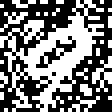

In [26]:
decode(sₒ) |> img -> Gray.(img) # corrupted true image. This is what we give the network

Now that we have a starting memory encoded in the state vector $\mathbf{s}_{\circ}$, can we recover the original image?
* _What do we expect to happen?_ Starting from the initial random configuration, we'll randomly select pixels and flip them (or at least evaluate the activation function). We'll store a copy of the (potentially) flipped state and compute the energy for the (potentially) flipped state. We expect the energy to decrease as we converge toward the correct image.
* _Implementation_: We implemented the recovery alogorithm above in [the `recover(...)` method](src/Compute.jl). This method takes our `model::MyClassicalHopfieldNetworkModel` instance, the initial configuration vector `sₒ::Array{Int32,1}`, the number `maxiterations::Int64` and the index of the true image that we are trying to recover, i.e., the `imageindextorecover::Int` variable. It returns the `frames` and `energydictionary` variables which hold information about each iteration of the recovery algorithm.

In [28]:
frames, energydictionary = recover(model, sₒ, maxiterations=25*number_of_pixels, trueindex = imageindextorecover);

In [29]:
frames

Dict{Int64, Vector{Int32}} with 4840 entries:
  4700 => [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  -1, -1, -1, -1, -1, -1, -…
  4576 => [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  -1, -1, -1, -1, -1, -1, -…
  2288 => [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  -1, -1, -1, -1, -1, -1, -…
  1703 => [-1, -1, -1, 1, -1, -1, -1, -1, -1, -1  …  -1, -1, -1, -1, -1, -1, -1…
  1956 => [-1, -1, -1, 1, -1, -1, -1, -1, -1, -1  …  -1, -1, -1, -1, -1, -1, -1…
  2350 => [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  -1, -1, -1, -1, -1, -1, -…
  3406 => [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  -1, -1, -1, -1, -1, -1, -…
  2841 => [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  -1, -1, -1, -1, -1, -1, -…
  2876 => [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1  …  -1, -1, -1, -1, -1, -1, -…
  687  => [-1, -1, -1, 1, -1, -1, -1, 1, -1, -1  …  -1, 1, -1, -1, -1, -1, -1, …
  185  => [-1, -1, -1, 1, 1, -1, -1, 1, 1, -1  …  -1, 1, -1, 1, -1, -1, -1, -1,…
  1090 => [-1, -1, -1, 1, -1, -1, -1, 1, -1, -1  …  -1, 1, -1, 

Which image does the model recover?

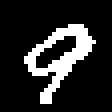

In [31]:
let
    lastindex = keys(energydictionary) |> collect |> sort |> last
    energydictionary[lastindex]
    frames[lastindex] |> s-> decode(s) |> img -> Gray.(img)
end

What is the energy that we recover?

In [33]:
let
    lastindex = keys(energydictionary) |> collect |> sort |> last
    energydictionary[lastindex]
end

-225497.31f0

In [34]:
model.energy

Dict{Int64, Float32} with 2 entries:
  2 => -2.25497f5
  1 => -2.25476f5

Does the energy decrease as we flip the states in the network? Let's plot the values in the `energydictionary::Dict{Int64, Float32}` and see.

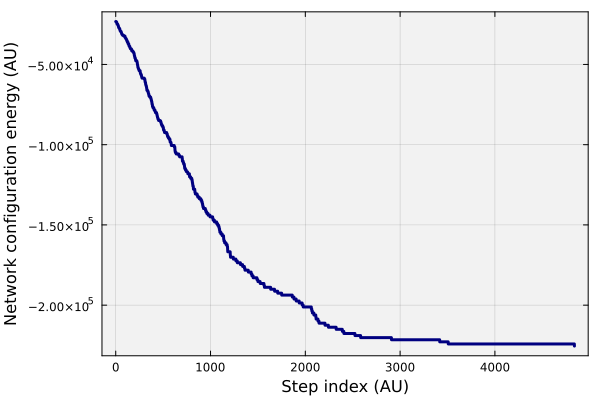

In [36]:
let
    p = plot(bg="gray95", background_color_outside="white", framestyle = :box, fg_legend = :transparent); 
    plot!(energydictionary, lw=3,c=:navy, label="");
    xlabel!("Step index (AU)", fontsize=18)
    ylabel!("Network configuration energy (AU)", fontsize=18)
end

# Next time
The classical version of the Hopfield network encodes only binary (or bipolar) memories. It would be much better if we could encode continuous memories. Toward this challenge, we look at [Modern Hopfield networks](https://arxiv.org/abs/2008.02217) in lecture `L9c`.

# Extra
Let's look at a movie showing how the model changes each iteration. Set the `do_I_want_to_see_a_movie = true` to see a frame-by-frame update.

In [39]:
do_I_want_to_see_a_movie = false; # Flag that controls movie play {true | false}. Movie is *slow*

In [40]:
let
    
    if (do_I_want_to_see_a_movie == true)
        number_of_frames_to_view = length(frames);
        for i ∈ 0:(number_of_frames_to_view-1)
            image_index_to_view = i;
            s = frames[image_index_to_view];
            image = decode(s);
            display(Gray.(image))
            println("Turn index = $(i)")
            IJulia.clear_output(true) # may not work in VSCode?
            sleep(0.01) # add some delay
        end
    end
end